In [537]:
import pandas as pd
import numpy as np
from autoviz.AutoViz_Class import AutoViz_Class
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as misno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from catboost import CatBoostClassifier
from xgboost import XGBClassifier, plot_importance
import sklearn.metrics as skm
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTENC
import joblib

## EDA ##

In [538]:
df=pd.read_csv(r"C:\Users\Dell\Desktop\ML course\RoadTrafficAccident_Project1\Dataset\RTA Dataset.csv")

In [539]:
# EDA- Observe the data type of features and null values, goal is to have numeric/string/boolean/categorical/date
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [540]:
df.head()

Time   Day_of_week Age_band_of_driver Sex_of_driver  Educational_level   \
0  17:02:00    Monday          18-30            Male       Above high school   
1  17:02:00    Monday          31-50            Male      Junior high school   
2  17:02:00    Monday          18-30            Male      Junior high school   
3   1:06:00    Sunday          18-30            Male      Junior high school   
4   1:06:00    Sunday          18-30            Male      Junior high school   

  Vehicle_driver_relation Driving_experience   Type_of_vehicle     \
0         Employee                 1-2yr               Automobile   
1         Employee            Above 10yr      Public (> 45 seats)   
2         Employee                 1-2yr          Lorry (41?100Q)   
3         Employee                5-10yr      Public (> 45 seats)   
4         Employee                 2-5yr                      NaN   

  Owner_of_vehicle Service_year_of_vehicle Defect_of_vehicle  \
0          Owner          Above 10yr            No defect      
1          Owner             5-10yrs            No defect      
2          Owner                 NaN            No defect      
3   Governmental                 NaN            No defect      
4          Owner             5-10yrs            No defect      

  Area_accident_occured  Lanes_or_Medians   \
0     Residential areas                NaN   
1          Office areas  Undivided Two way   
2    Recreational areas              other   
3          Office areas              other   
4      Industrial areas              other   

                 Road_allignment                 Types_of_Junction  \
0                 Tangent road with flat terrain     No junction     
1                 Tangent road with flat terrain     No junction     
2                                            NaN     No junction     
3  Tangent road with mild grade and flat terrain         Y Shape     
4                 Tangent road with flat terrain         Y Shape     

  Road_surface_type Road_surface_conditions    Light_conditions     \
0    Asphalt roads             Dry                        Daylight   
1    Asphalt roads             Dry                        Daylight   
2    Asphalt roads             Dry                        Daylight   
3      Earth roads             Dry           Darkness - lights lit   
4    Asphalt roads             Dry           Darkness - lights lit   

  Weather_conditions            Type_of_collision              \
0       Normal        Collision with roadside-parked vehicles   
1       Normal                 Vehicle with vehicle collision   
2       Normal                Collision with roadside objects   
3       Normal                 Vehicle with vehicle collision   
4       Normal                 Vehicle with vehicle collision   

   Number_of_vehicles_involved  Number_of_casualties Vehicle_movement  \
0               2                         2           Going straight    
1               2                         2           Going straight    
2               2                         2           Going straight    
3               2                         2           Going straight    
4               2                         2           Going straight    

   Casualty_class  Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0               na          na                na                na          
1               na          na                na                na          
2  Driver or rider        Male             31-50                 3          
3       Pedestrian      Female             18-30                 3          
4               na          na                na                na          

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0          NaN                NaN          Not a Pedestrian    
1          NaN                NaN          Not a Pedestrian    
2       Driver                NaN          Not a Pedestrian    
3       Driver             Normal          Not a Pedestr

In [541]:
# Replace unknown with NULLs
df = df.replace(to_replace=['Unknown','na','unknown'], value=np.nan)

In [542]:
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = df['Time'].dt.hour
df['Min'] = df['Time'].dt.minute
df = df.drop(columns = 'Time')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Age_band_of_driver           10768 non-null  object
 2   Sex_of_driver                12138 non-null  object
 3   Educational_level            11475 non-null  object
 4   Vehicle_driver_relation      11723 non-null  object
 5   Driving_experience           11454 non-null  object
 6   Type_of_vehicle              11366 non-null  object
 7   Owner_of_vehicle             11834 non-null  object
 8   Service_year_of_vehicle      5505 non-null   object
 9   Defect_of_vehicle            7889 non-null   object
 10  Area_accident_occured        12055 non-null  object
 11  Lanes_or_Medians             11874 non-null  object
 12  Road_allignment              12174 non-null  object
 13  Types_of_Junction            11

In [543]:
for col in df.drop(columns = ['Number_of_vehicles_involved','Number_of_casualties','Hour','Min']) :
        df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Day_of_week                  12316 non-null  category
 1   Age_band_of_driver           10768 non-null  category
 2   Sex_of_driver                12138 non-null  category
 3   Educational_level            11475 non-null  category
 4   Vehicle_driver_relation      11723 non-null  category
 5   Driving_experience           11454 non-null  category
 6   Type_of_vehicle              11366 non-null  category
 7   Owner_of_vehicle             11834 non-null  category
 8   Service_year_of_vehicle      5505 non-null   category
 9   Defect_of_vehicle            7889 non-null   category
 10  Area_accident_occured        12055 non-null  category
 11  Lanes_or_Medians             11874 non-null  category
 12  Road_allignment              12174 non-null  category
 13  T

In [544]:
df.describe(include = 'category')
df_unencoded = df.copy()

Shape of your Data Set loaded: (12316, 33)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  4
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  28
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    32 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Multi_Classification problem #####################
Number of variables = 

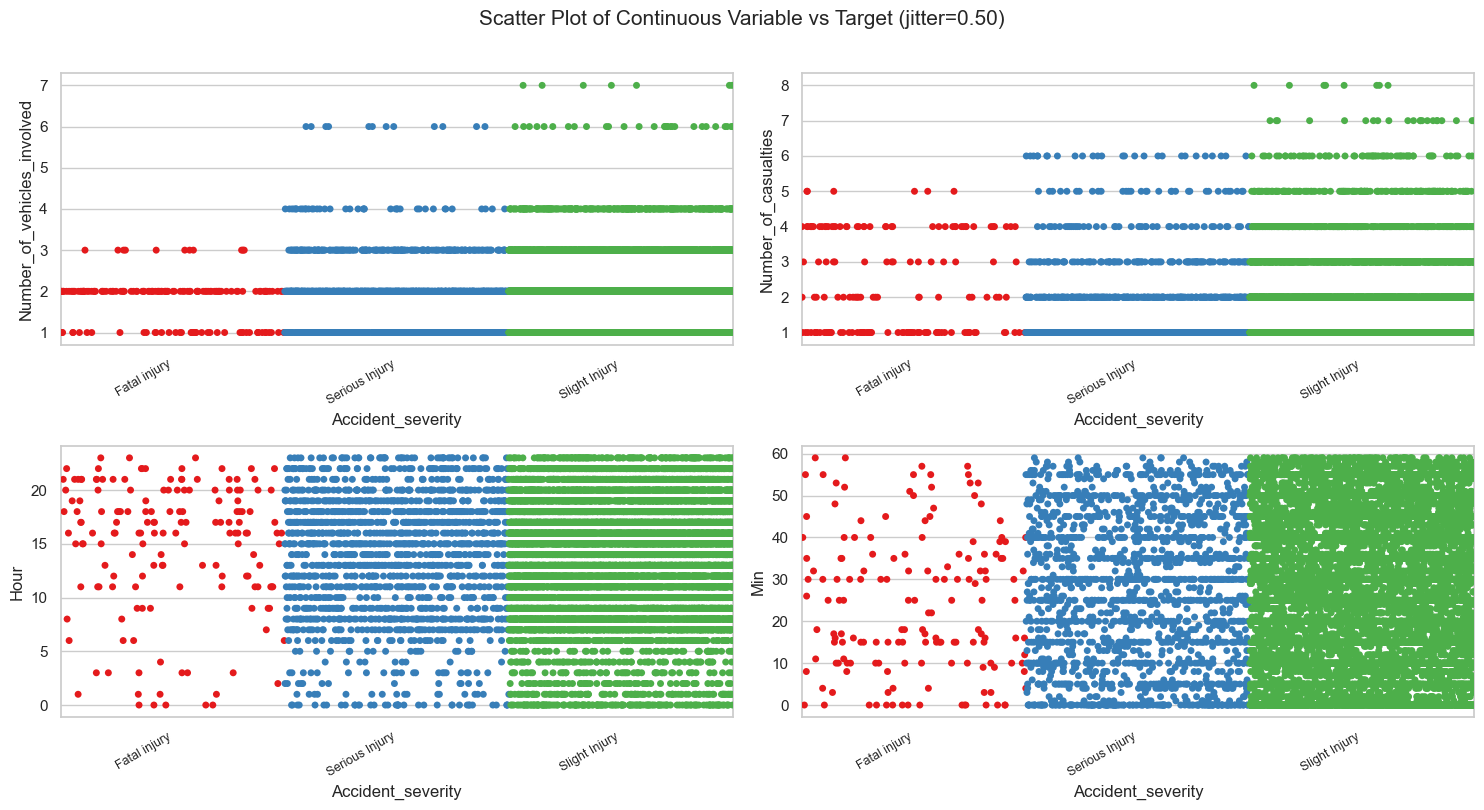

Total Number of Scatter Plots = 10


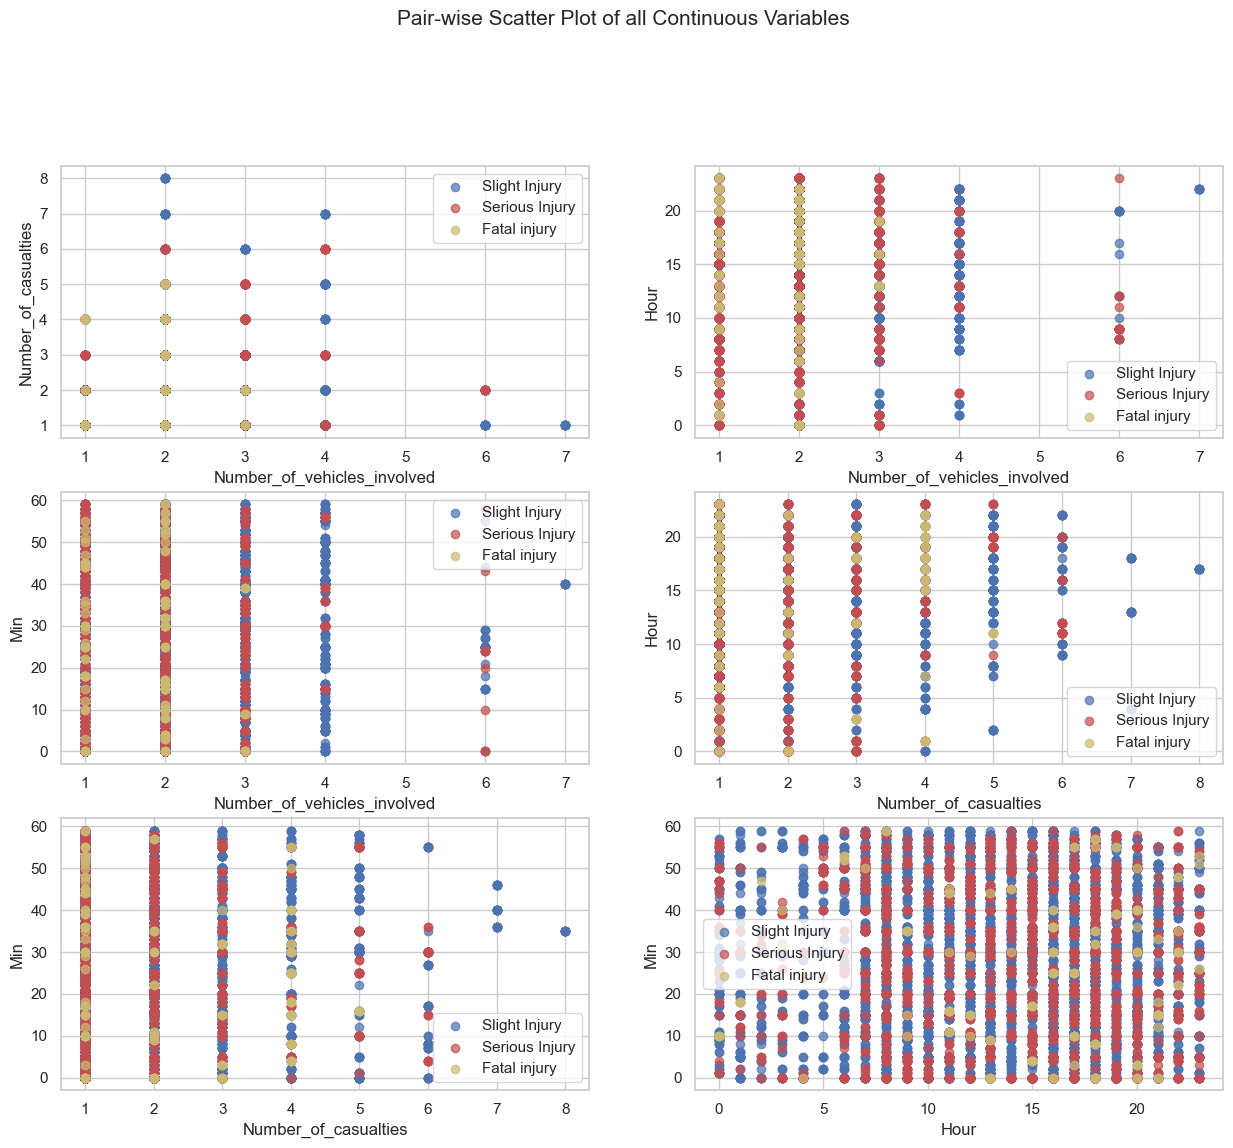

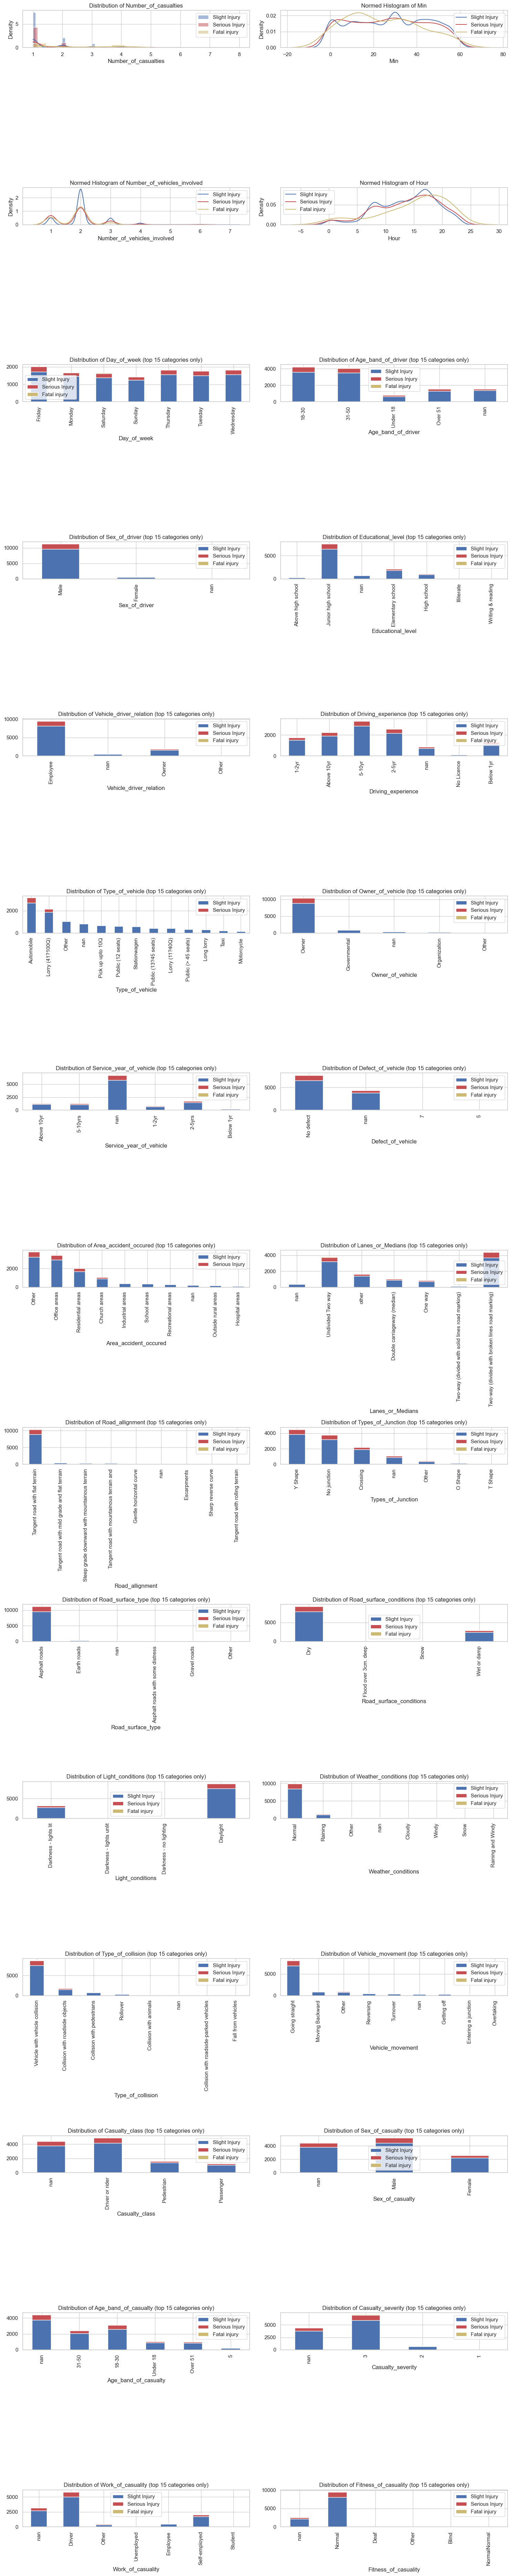

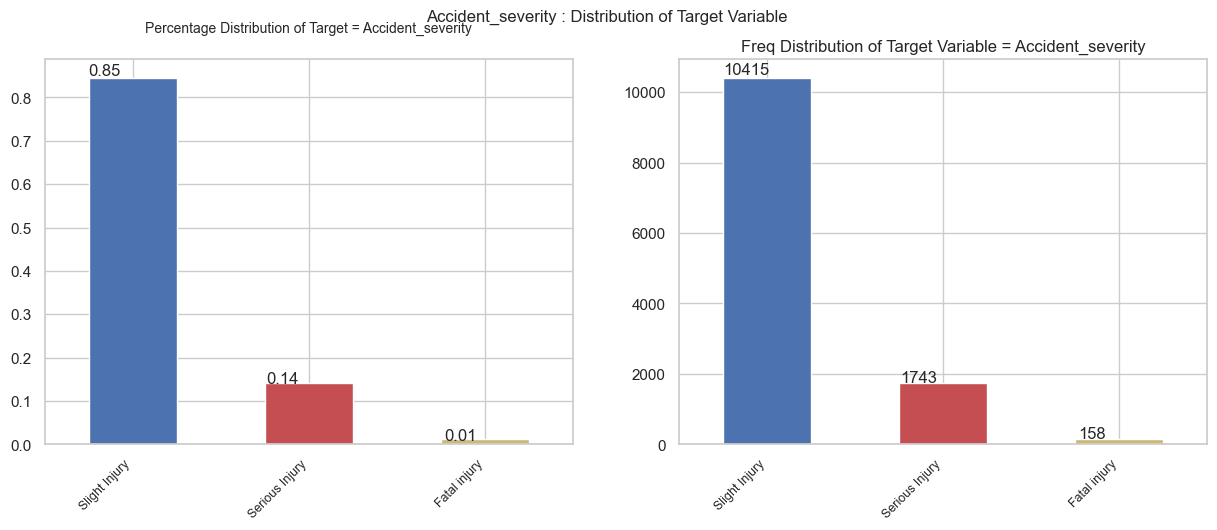

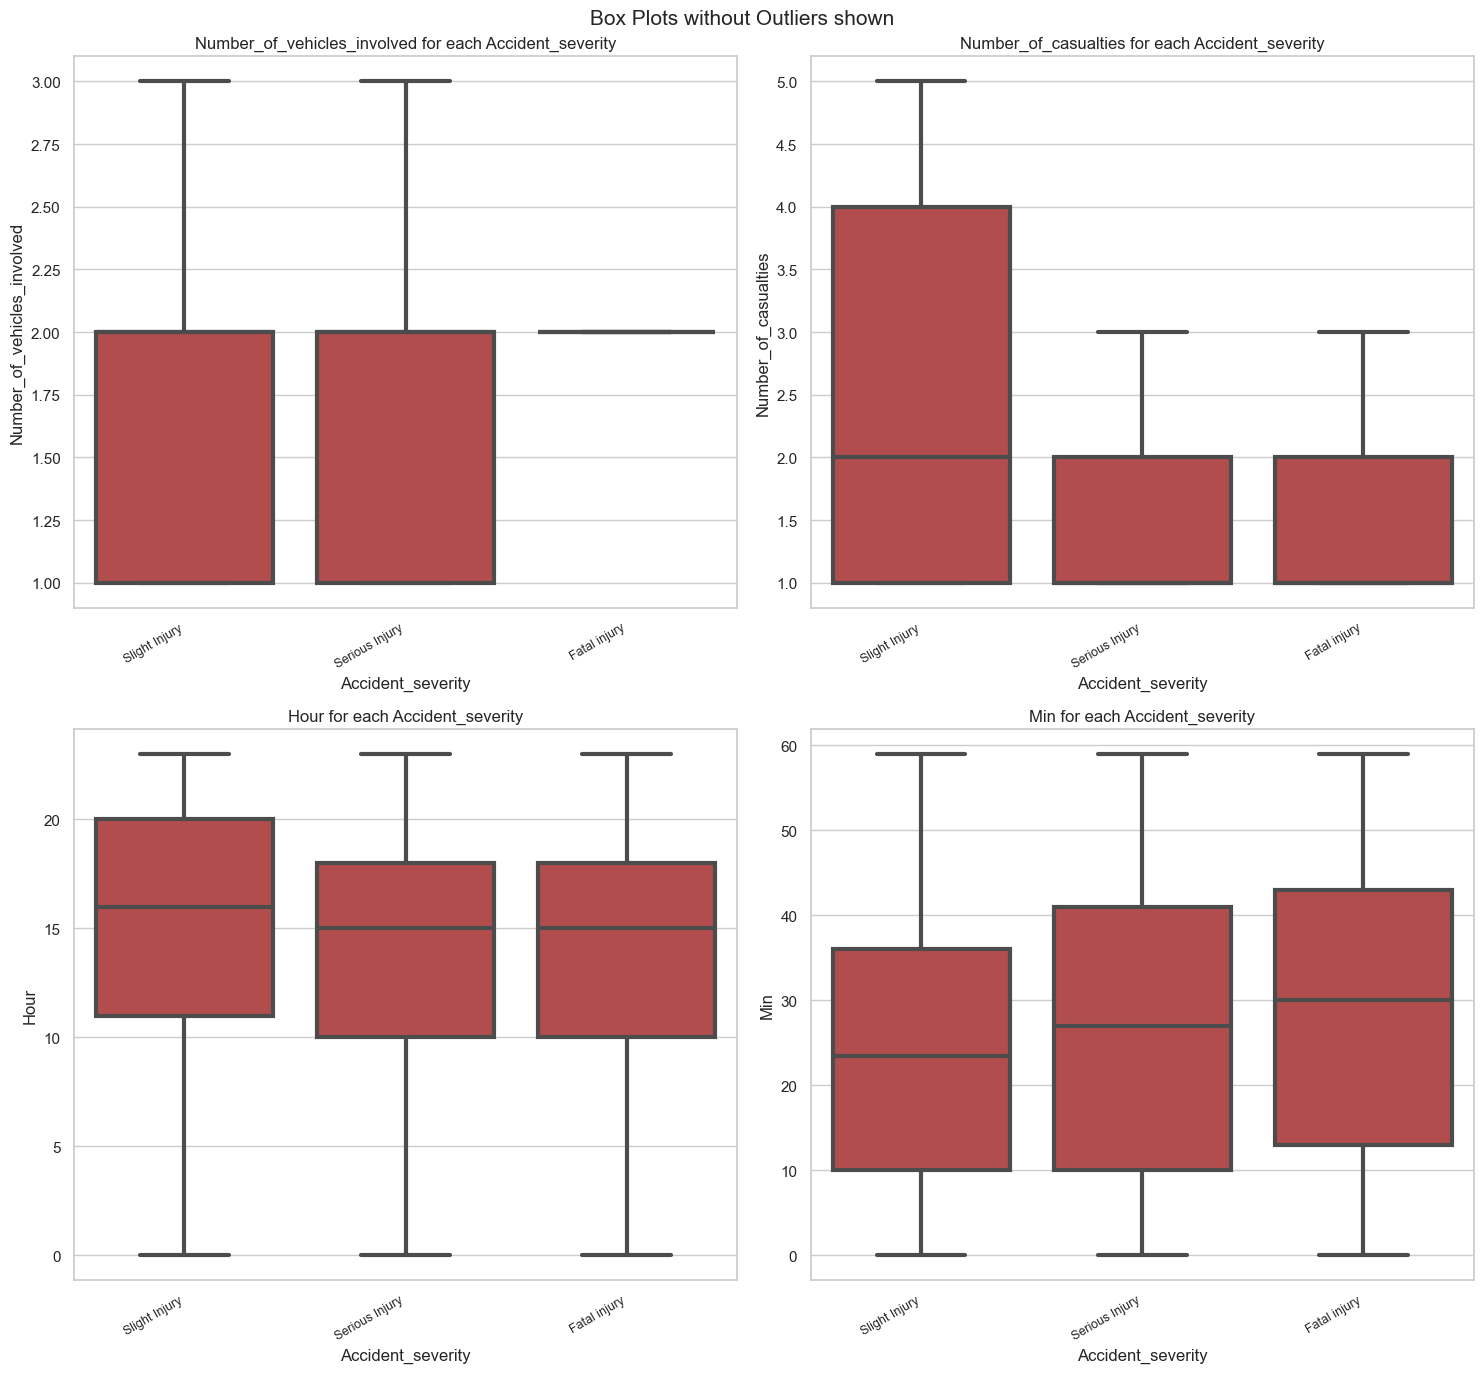

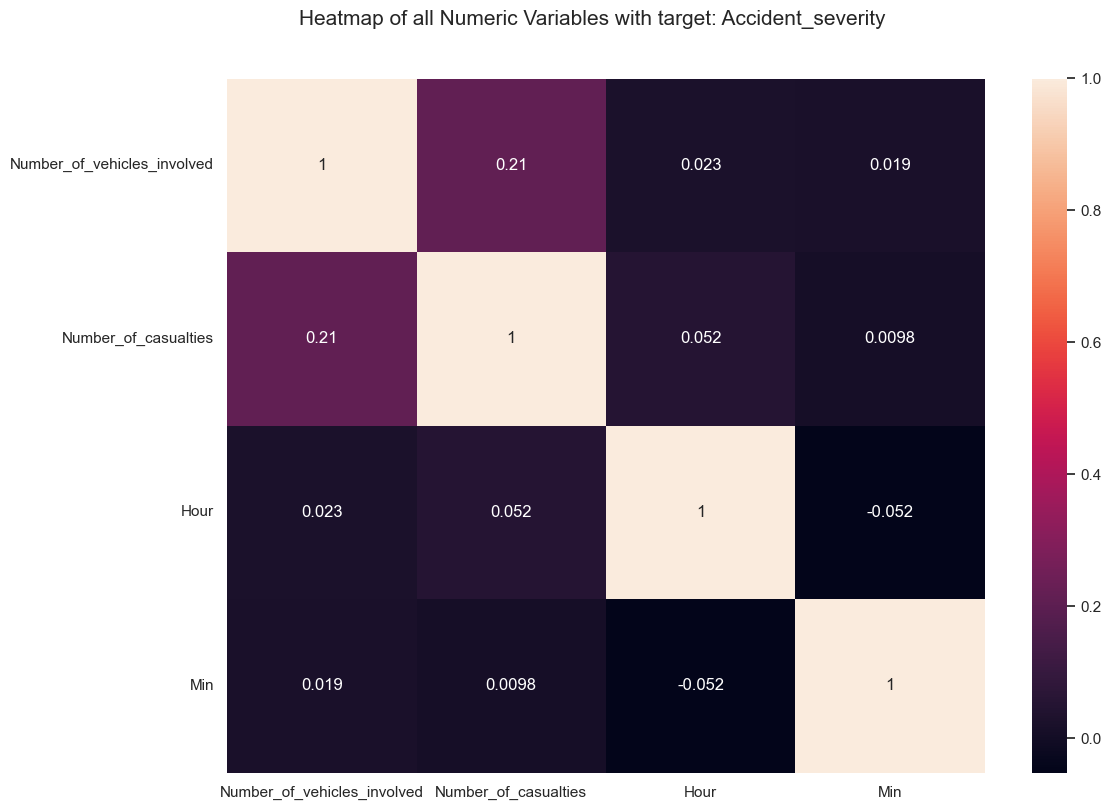

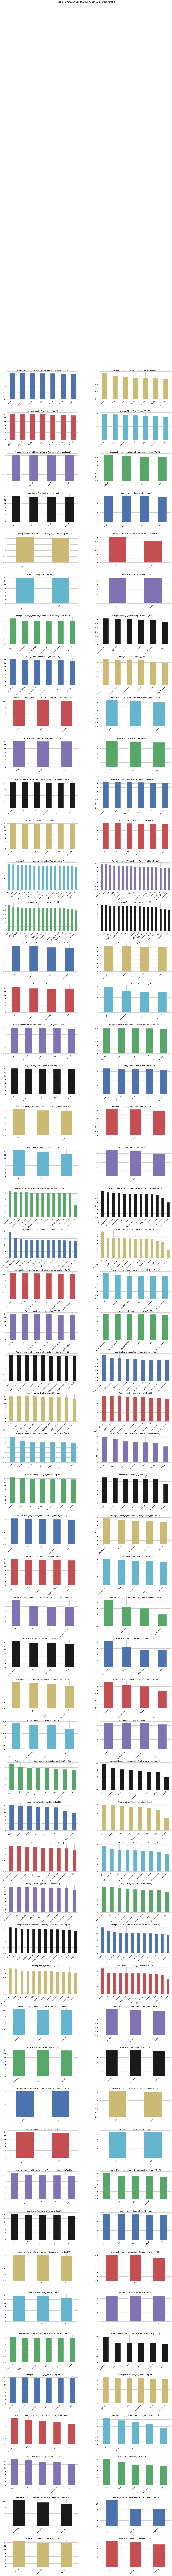

All Plots done
Time to run AutoViz = 43 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [546]:
# Not working after converting objects to categorical variables, works otherwise
# DQ and FS will be available in autoviz version>=0.1.50
av = AutoViz_Class()
df = av.AutoViz(filename = "",depVar = 'Accident_severity', dfte = df)

In [547]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Number_of_vehicles_involved  12316 non-null  int64   
 1   Number_of_casualties         12316 non-null  int64   
 2   Hour                         12316 non-null  int64   
 3   Min                          12316 non-null  int64   
 4   Day_of_week                  12316 non-null  category
 5   Age_band_of_driver           10768 non-null  category
 6   Sex_of_driver                12138 non-null  category
 7   Educational_level            11475 non-null  category
 8   Vehicle_driver_relation      11723 non-null  category
 9   Driving_experience           11454 non-null  category
 10  Type_of_vehicle              11366 non-null  category
 11  Owner_of_vehicle             11834 non-null  category
 12  Service_year_of_vehicle      5505 non-null   category
 13  D

**Treating Outliers**

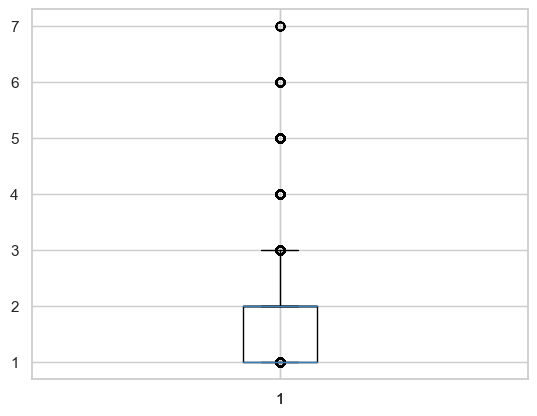

In [548]:
index_removed = df[df['Number_of_casualties'] == 8].index
df = df.drop(index = index_removed)
plt.boxplot(df['Number_of_casualties'])

index_removed = df[df['Number_of_vehicles_involved'] == 7].index
df = df.drop(index = index_removed)
plt.boxplot(df['Number_of_vehicles_involved'])

df[df['Road_surface_conditions'] == 'Flood over 3cm. deep']
df = df.drop(index = [5853,5854])

<Axes: >

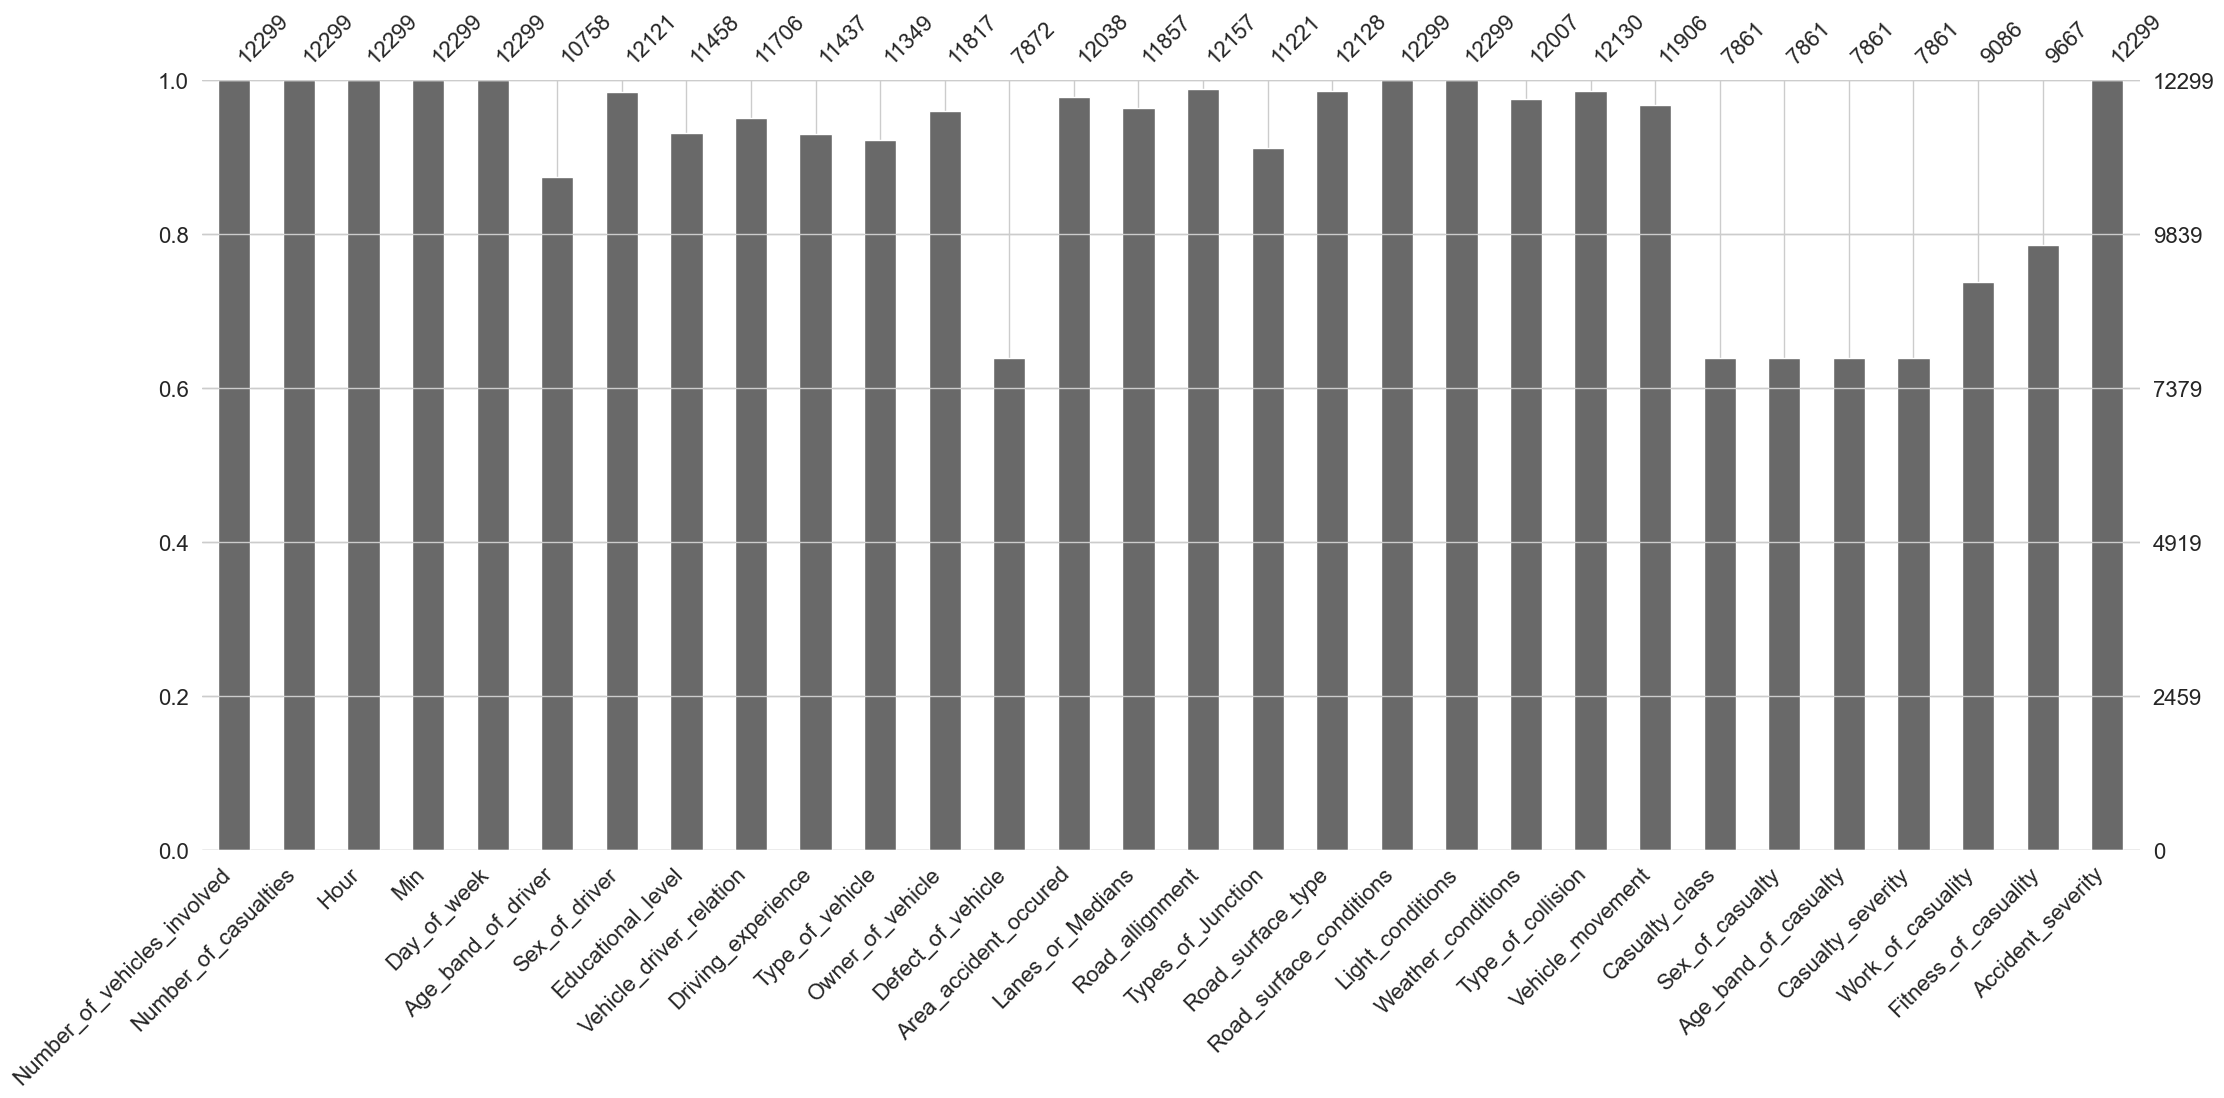

In [549]:
# If a column more than 50% of missing values and the feature is not significant, delete that feature 
df = df.drop(columns='Service_year_of_vehicle')
misno.bar(df)

<Axes: >

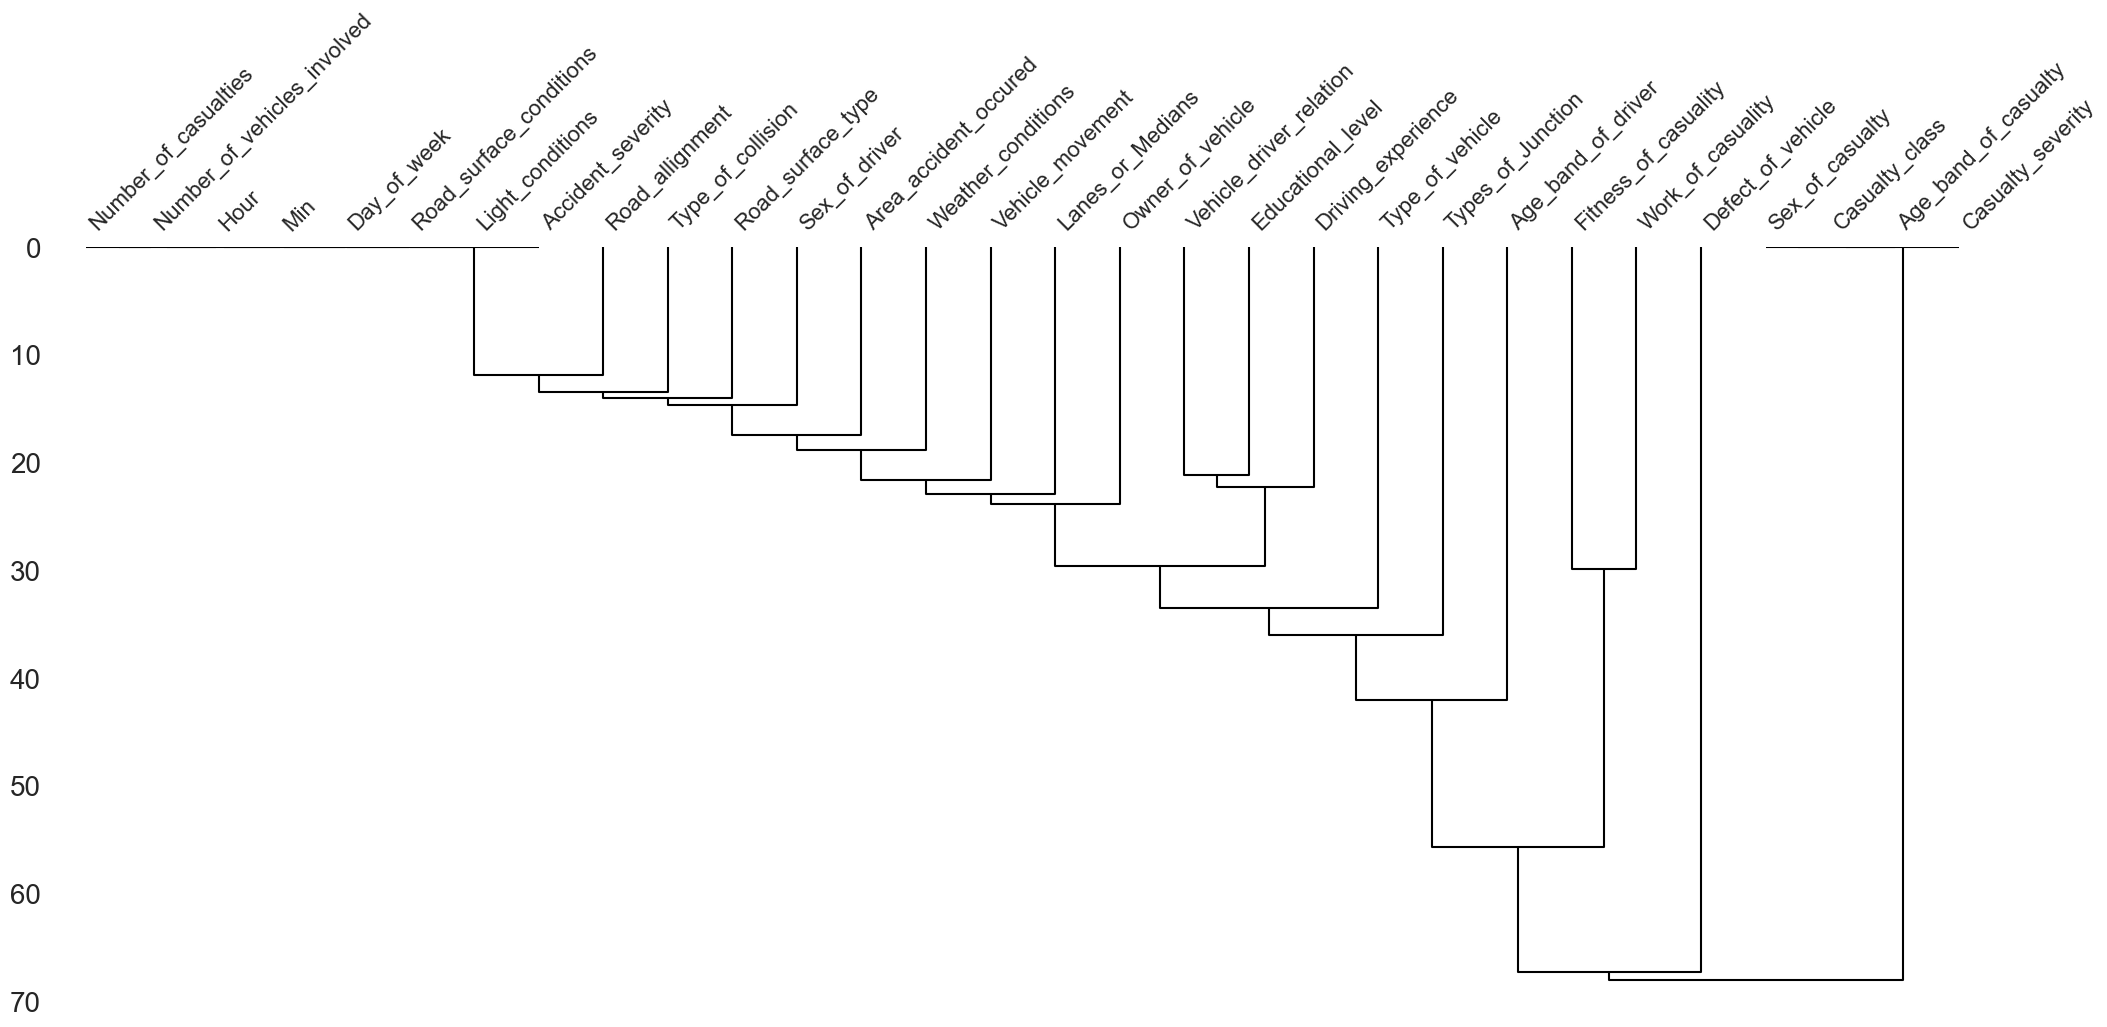

In [395]:
# Start from the top, nulls of Road_Alignment and light_conditions seem to have the strongest corr_coeff
# Based on the graph, some casualtly values are missing, hence severity,age,class and sex are missing
misno.dendrogram(df)

In [550]:
imp = SimpleImputer(strategy = 'most_frequent')
df = pd.DataFrame(imp.fit_transform(df),columns = df.columns).astype(df.dtypes.to_dict())
df.duplicated().sum()
df

Number_of_vehicles_involved  Number_of_casualties  Hour  Min  \
0                   2                         2            17    2    
1                   2                         2            17    2    
2                   2                         2            17    2    
3                   2                         2             1    6    
4                   2                         2             1    6    
...                            ...                   ...   ...  ...   
12294               2                         1            16   15    
12295               2                         1            18    0    
12296               1                         1            13   55    
12297               2                         1            13   55    
12298               2                         1            13   55    

      Day_of_week Age_band_of_driver Sex_of_driver  Educational_level   \
0          Monday         18-30            Male      Above high school   
1          Monday         31-50            Male     Junior high school   
2          Monday         18-30            Male     Junior high school   
3          Sunday         18-30            Male     Junior high school   
4          Sunday         18-30            Male     Junior high school   
...           ...                ...           ...                 ...   
12294   Wednesday         31-50            Male     Junior high school   
12295      Sunday         18-30            Male      Elementary school   
12296      Sunday       Over 51            Male     Junior high school   
12297      Sunday         18-30          Female     Junior high school   
12298      Sunday         18-30            Male     Junior high school   

      Vehicle_driver_relation Driving_experience   Type_of_vehicle     \
0             Employee                 1-2yr               Automobile   
1             Employee            Above 10yr      Public (> 45 seats)   
2             Employee                 1-2yr          Lorry (41?100Q)   
3             Employee                5-10yr      Public (> 45 seats)   
4             Employee                 2-5yr               Automobile   
...                       ...                ...                  ...   
12294         Employee                 2-5yr           Lorry (11?40Q)   
12295         Employee                5-10yr               Automobile   
12296         Employee                5-10yr                    Bajaj   
12297         Employee            Above 10yr          Lorry (41?100Q)   
12298         Employee                5-10yr                    Other   

      Owner_of_vehicle Defect_of_vehicle Area_accident_occured  \
0              Owner        No defect        Residential areas   
1              Owner        No defect             Office areas   
2              Owner        No defect       Recreational areas   
3       Governmental        No defect             Office areas   
4              Owner        No defect         Industrial areas   
...                ...               ...                   ...   
12294          Owner        No defect      Outside rural areas   
12295          Owner        No defect      Outside rural areas   
12296          Owner        No defect      Outside rural areas   
12297          Owner        No defect             Office areas   
12298          Owner        No defect      Outside rural areas   

                       Lanes_or_Medians                  \
0      Two-way (divided with broken lines road marking)   
1                                     Undivided Two way   
2                                                 other   
3                                                 other   
4                                                 other   
...                                                 ...   
12294                                 Undivided Two way   
12295  Two-way (divided with broken lines road marking)   
12296  Two-way (divided with broken lines road marking)   
12297

**Clubbing rare value**


In [553]:
# df_temp = df.copy()
index_rare = df['Type_of_vehicle'][df['Type_of_vehicle'].isin(['Special vehicle', 'Ridden horse', 'Turbo', 'Bajaj', 'Bicycle'])].index
df['Type_of_vehicle'][index_rare] = 'Special vehicle'


In [554]:
index_rural = df['Area_accident_occured'][df['Area_accident_occured'].isin(['Rural village areas', 'Rural village areasOffice areas'])].index
df['Area_accident_occured'][index_rural] = 'Rural village areas'


In [555]:
index_junc = df['Types_of_Junction'][df['Types_of_Junction'] == 'X Shape'].index
df['Types_of_Junction'][index_junc] = 'T Shape'

In [556]:
# Create X and y
df_temp = df.copy()
X = df.copy()
y=X['Accident_severity']
X=X.drop(columns = 'Accident_severity')
print (X.shape, '\n', y.shape)
X

(12299, 29) 
 (12299,)


Number_of_vehicles_involved  Number_of_casualties  Hour  Min  \
0                   2                         2            17    2    
1                   2                         2            17    2    
2                   2                         2            17    2    
3                   2                         2             1    6    
4                   2                         2             1    6    
...                            ...                   ...   ...  ...   
12294               2                         1            16   15    
12295               2                         1            18    0    
12296               1                         1            13   55    
12297               2                         1            13   55    
12298               2                         1            13   55    

      Day_of_week Age_band_of_driver Sex_of_driver  Educational_level   \
0          Monday         18-30            Male      Above high school   
1          Monday         31-50            Male     Junior high school   
2          Monday         18-30            Male     Junior high school   
3          Sunday         18-30            Male     Junior high school   
4          Sunday         18-30            Male     Junior high school   
...           ...                ...           ...                 ...   
12294   Wednesday         31-50            Male     Junior high school   
12295      Sunday         18-30            Male      Elementary school   
12296      Sunday       Over 51            Male     Junior high school   
12297      Sunday         18-30          Female     Junior high school   
12298      Sunday         18-30            Male     Junior high school   

      Vehicle_driver_relation Driving_experience   Type_of_vehicle     \
0             Employee                 1-2yr               Automobile   
1             Employee            Above 10yr      Public (> 45 seats)   
2             Employee                 1-2yr          Lorry (41?100Q)   
3             Employee                5-10yr      Public (> 45 seats)   
4             Employee                 2-5yr               Automobile   
...                       ...                ...                  ...   
12294         Employee                 2-5yr           Lorry (11?40Q)   
12295         Employee                5-10yr               Automobile   
12296         Employee                5-10yr          Special vehicle   
12297         Employee            Above 10yr          Lorry (41?100Q)   
12298         Employee                5-10yr                    Other   

      Owner_of_vehicle Defect_of_vehicle Area_accident_occured  \
0              Owner        No defect        Residential areas   
1              Owner        No defect             Office areas   
2              Owner        No defect       Recreational areas   
3       Governmental        No defect             Office areas   
4              Owner        No defect         Industrial areas   
...                ...               ...                   ...   
12294          Owner        No defect      Outside rural areas   
12295          Owner        No defect      Outside rural areas   
12296          Owner        No defect      Outside rural areas   
12297          Owner        No defect             Office areas   
12298          Owner        No defect      Outside rural areas   

                       Lanes_or_Medians                  \
0      Two-way (divided with broken lines road marking)   
1                                     Undivided Two way   
2                                                 other   
3                                                 other   
4                                                 other   
...                                                 ...   
12294                                 Undivided Two way   
12295  Two-way (divided with broken lines road marking)   
12296  Two-way (divided with broken lines road marking)   
12297

In [452]:
X_or = X.copy()
y_or = y.copy()

(12299,)

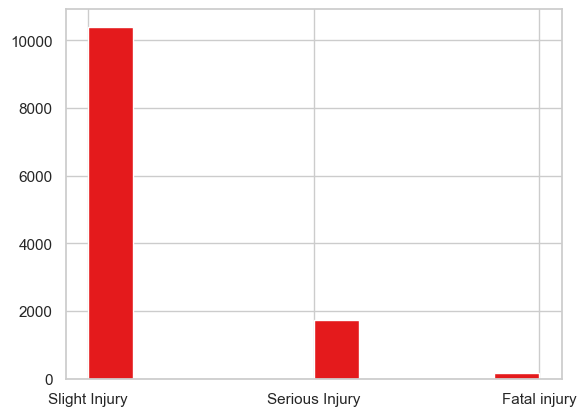

In [558]:
plt.hist(y)
y.shape

In [559]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [560]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8609 entries, 5344 to 7270
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Number_of_vehicles_involved  8609 non-null   int64   
 1   Number_of_casualties         8609 non-null   int64   
 2   Hour                         8609 non-null   int64   
 3   Min                          8609 non-null   int64   
 4   Day_of_week                  8609 non-null   category
 5   Age_band_of_driver           8609 non-null   category
 6   Sex_of_driver                8609 non-null   category
 7   Educational_level            8609 non-null   category
 8   Vehicle_driver_relation      8609 non-null   category
 9   Driving_experience           8609 non-null   category
 10  Type_of_vehicle              8609 non-null   category
 11  Owner_of_vehicle             8609 non-null   category
 12  Defect_of_vehicle            8609 non-null   category
 13  

(8609,)

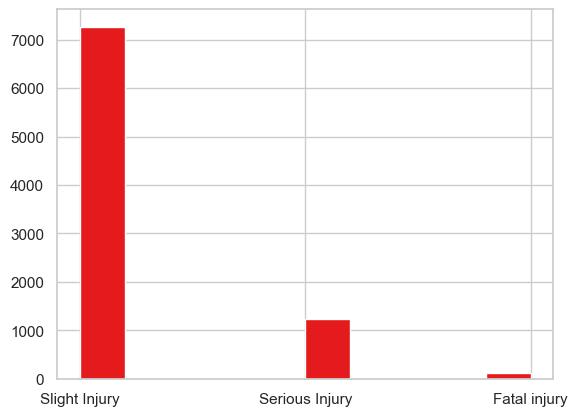

In [561]:
plt.hist(y_train)
y_train.shape

(3690,)

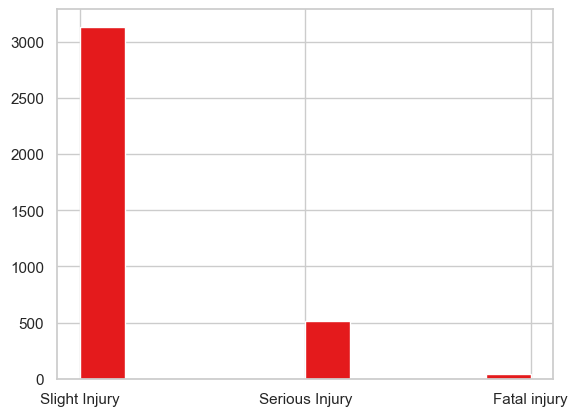

In [562]:
plt.hist(y_test)
y_test.shape

In [563]:
smt = SMOTENC(categorical_features = [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28])
X_new_train,y_new_train = smt.fit_resample(X_train,y_train)

(7266,)

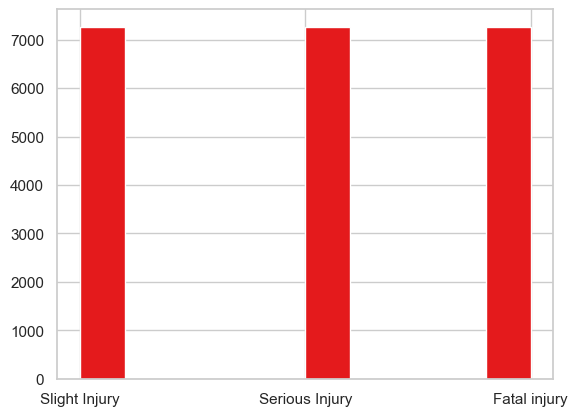

In [574]:
# Target train data is balanced
plt.hist(y_new_train)
y_new_train.shape
y_new_train[y_new_train == 'Slight Injury'].shape

In [566]:
y_new_train.describe(include = ['O'])

count            21798
unique               3
top       Fatal injury
freq              7266
Name: Accident_severity, dtype: object

(3690,)

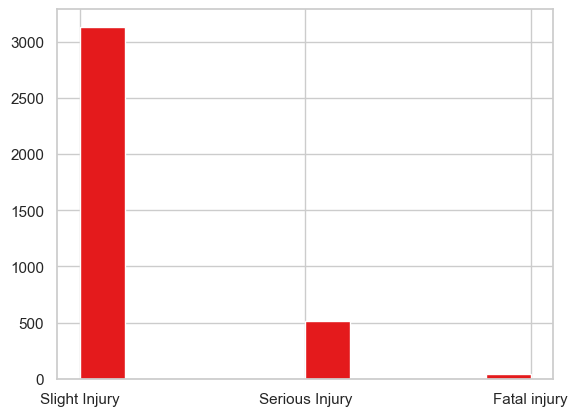

In [575]:
plt.hist(y_test)
y_test.shape

In [457]:
X_new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21798 entries, 0 to 21797
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Number_of_vehicles_involved  21798 non-null  int64   
 1   Number_of_casualties         21798 non-null  int64   
 2   Hour                         21798 non-null  int64   
 3   Min                          21798 non-null  int64   
 4   Day_of_week                  21798 non-null  category
 5   Age_band_of_driver           21798 non-null  category
 6   Sex_of_driver                21798 non-null  category
 7   Educational_level            21798 non-null  category
 8   Vehicle_driver_relation      21798 non-null  category
 9   Driving_experience           21798 non-null  category
 10  Type_of_vehicle              21798 non-null  category
 11  Owner_of_vehicle             21798 non-null  category
 12  Defect_of_vehicle            21798 non-null  category
 13  A

## Baseline Modeling ##

In [50]:
cb = CatBoostClassifier()
cb.fit(X_new_train,y_new_train,cat_features = [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28])

Learning rate set to 0.092606
0:	learn: 1.0558083	total: 404ms	remaining: 6m 43s
1:	learn: 1.0215441	total: 688ms	remaining: 5m 43s
2:	learn: 0.9939881	total: 989ms	remaining: 5m 28s
3:	learn: 0.9713809	total: 1.21s	remaining: 5m 2s
4:	learn: 0.9496158	total: 1.41s	remaining: 4m 40s
5:	learn: 0.9294312	total: 1.6s	remaining: 4m 25s
6:	learn: 0.9081264	total: 1.78s	remaining: 4m 12s
7:	learn: 0.8911412	total: 2.01s	remaining: 4m 8s
8:	learn: 0.8710182	total: 2.22s	remaining: 4m 4s
9:	learn: 0.8517698	total: 2.45s	remaining: 4m 2s
10:	learn: 0.8342948	total: 2.65s	remaining: 3m 58s
11:	learn: 0.8222238	total: 2.84s	remaining: 3m 53s
12:	learn: 0.8111768	total: 3.04s	remaining: 3m 50s
13:	learn: 0.7986683	total: 3.26s	remaining: 3m 49s
14:	learn: 0.7823734	total: 3.48s	remaining: 3m 48s
15:	learn: 0.7724114	total: 3.67s	remaining: 3m 45s
16:	learn: 0.7604118	total: 3.89s	remaining: 3m 45s
17:	learn: 0.7457487	total: 4.11s	remaining: 3m 44s
18:	learn: 0.7362456	total: 4.31s	remaining: 3m 4

In [52]:
y_cb_pred = cb.predict(X_test)
print (f'BASELINE CATBOOST')
print (skm.classification_report(y_test,y_cb_pred,output_dict = True, target_names = ['Slight','Serious','Fatal']))
print (f'Accuracy from catboost is: {round(skm.accuracy_score(y_test,y_cb_pred)*100,2)}%')

BASELINE CATBOOST
{'Slight': {'precision': 0.09523809523809523, 'recall': 0.08888888888888889, 'f1-score': 0.09195402298850575, 'support': 45.0}, 'Serious': {'precision': 0.2664015904572565, 'recall': 0.2528301886792453, 'f1-score': 0.25943852855759925, 'support': 530.0}, 'Fatal': {'precision': 0.8642720915448188, 'recall': 0.8725930680359435, 'f1-score': 0.8684126477163845, 'support': 3116.0}, 'accuracy': 0.7740449742617177, 'macro avg': {'precision': 0.4086372590800568, 'recall': 0.40477071520135927, 'f1-score': 0.4066017330874965, 'support': 3691.0}, 'weighted avg': {'precision': 0.769046435784805, 'recall': 0.7740449742617177, 'f1-score': 0.7715020757123447, 'support': 3691.0}}
Accuracy from catboost is: 77.4%


In [598]:
# XGBoost cannot handle categorical variables, hence they need to be manually encoded
# Target needs to have values starting with 0, hence using LabelEncoder() instead of OrdinalEncoder()
xgb = XGBClassifier()
label = LabelEncoder()
y_new_train_encoded =  label.fit_transform(y_new_train)
y_test_encoded = label.fit_transform(y_test)

In [599]:
encode = ce.OrdinalEncoder()
X_new_train_encoded = encode.fit_transform(X_new_train)
X_test_encoded = encode.fit_transform(X_test)

In [603]:
# To check the encoding of diff. labels of y
print (y_new_train_encoded, label.inverse_transform(y_new_train_encoded))
print (y_test_encoded, label.inverse_transform(y_test_encoded))

[2 2 2 ... 1 1 1] ['Slight Injury' 'Slight Injury' 'Slight Injury' ... 'Serious Injury'
 'Serious Injury' 'Serious Injury']
[2 2 2 ... 2 2 2] ['Slight Injury' 'Slight Injury' 'Slight Injury' ... 'Slight Injury'
 'Slight Injury' 'Slight Injury']


In [604]:
xgb.fit(X_new_train_encoded,y_new_train_encoded)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [605]:
y_xgb_pred = xgb.predict(X_new_test_encoded)
print ('XGBOOST BASELINE MODELING')
print (skm.classification_report(y_new_test_encoded,y_xgb_pred,output_dict = True, target_names = ['Fatal','Serious','Slight']))
print (f'Accuracy is {skm.accuracy_score(y_new_test_encoded,y_xgb_pred)*100}')

XGBOOST BASELINE MODELING
{'Fatal': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 47.0}, 'Serious': {'precision': 0.35294117647058826, 'recall': 0.011741682974559686, 'f1-score': 0.022727272727272728, 'support': 511.0}, 'Slight': {'precision': 0.8497141301388511, 'recall': 0.9964878671775224, 'f1-score': 0.9172667156502572, 'support': 3132.0}, 'accuracy': 0.8474254742547426, 'macro avg': {'precision': 0.4008851022031465, 'recall': 0.3360765167173607, 'f1-score': 0.31333132945917663, 'support': 3690.0}, 'weighted avg': {'precision': 0.7700969096941335, 'recall': 0.8474254742547426, 'f1-score': 0.7817054172846185, 'support': 3690.0}}
Accuracy is 84.74254742547426


## Model and feature selection ##

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

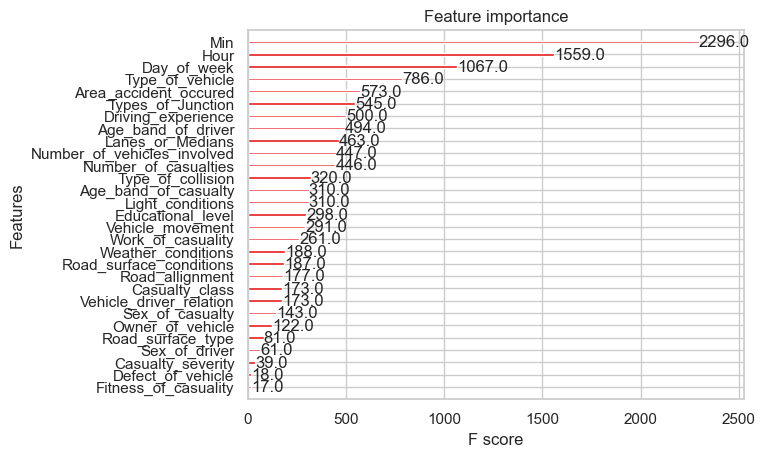

In [606]:
plot_importance(xgb)

In [607]:
# Consider features whose f-score is >=490
print (xgb.feature_names_in_)
selected_features = ['Hour', 'Min', 'Day_of_week', 'Age_band_of_driver',
       'Driving_experience', 'Type_of_vehicle',
       'Area_accident_occured','Types_of_Junction']

['Number_of_vehicles_involved' 'Number_of_casualties' 'Hour' 'Min'
 'Day_of_week' 'Age_band_of_driver' 'Sex_of_driver' 'Educational_level'
 'Vehicle_driver_relation' 'Driving_experience' 'Type_of_vehicle'
 'Owner_of_vehicle' 'Defect_of_vehicle' 'Area_accident_occured'
 'Lanes_or_Medians' 'Road_allignment' 'Types_of_Junction'
 'Road_surface_type' 'Road_surface_conditions' 'Light_conditions'
 'Weather_conditions' 'Type_of_collision' 'Vehicle_movement'
 'Casualty_class' 'Sex_of_casualty' 'Age_band_of_casualty'
 'Casualty_severity' 'Work_of_casuality' 'Fitness_of_casuality']


In [619]:
X_select = X[selected_features]
encode = ce.OrdinalEncoder()
X_select = encode.fit_transform(X_select)
print (X_select.head())
print(encode.inverse_transform(X_select).head())

   Hour  Min  Day_of_week  Age_band_of_driver  Driving_experience  \
0   17    2        1                1                   1           
1   17    2        1                2                   2           
2   17    2        1                1                   1           
3    1    6        2                1                   3           
4    1    6        2                1                   4           

   Type_of_vehicle  Area_accident_occured  Types_of_Junction  
0         1                   1                    1          
1         2                   2                    1          
2         3                   3                    1          
3         2                   2                    2          
4         1                   4                    2          
   Hour  Min Day_of_week Age_band_of_driver Driving_experience  \
0   17    2     Monday          18-30                1-2yr       
1   17    2     Monday          31-50           Above 10yr       
2   17   

In [621]:
label = LabelEncoder()
y_select = label.fit_transform(y)
print (y_select)
print(label.inverse_transform(y_select))

[2 2 1 ... 1 2 2]
['Slight Injury' 'Slight Injury' 'Serious Injury' ... 'Serious Injury'
 'Slight Injury' 'Slight Injury']


In [622]:
X_train, X_test, y_train, y_test = train_test_split(X_select,y_select,test_size = 0.3, random_state =42)
evalset = [(X_train, y_train), (X_test,y_test)]

In [623]:
xgb.fit(X_train,y_train,eval_metric = 'mlogloss', eval_set = evalset)

[0]	validation_0-mlogloss:0.85351	validation_1-mlogloss:0.85530
[1]	validation_0-mlogloss:0.71158	validation_1-mlogloss:0.71576
[2]	validation_0-mlogloss:0.62282	validation_1-mlogloss:0.62966
[3]	validation_0-mlogloss:0.56191	validation_1-mlogloss:0.57333
[4]	validation_0-mlogloss:0.52123	validation_1-mlogloss:0.53631
[5]	validation_0-mlogloss:0.49139	validation_1-mlogloss:0.51093
[6]	validation_0-mlogloss:0.47003	validation_1-mlogloss:0.49290
[7]	validation_0-mlogloss:0.45189	validation_1-mlogloss:0.48040
[8]	validation_0-mlogloss:0.43924	validation_1-mlogloss:0.47182
[9]	validation_0-mlogloss:0.42806	validation_1-mlogloss:0.46492
[10]	validation_0-mlogloss:0.41912	validation_1-mlogloss:0.45956
[11]	validation_0-mlogloss:0.41196	validation_1-mlogloss:0.45566
[12]	validation_0-mlogloss:0.40499	validation_1-mlogloss:0.45245
[13]	validation_0-mlogloss:0.39889	validation_1-mlogloss:0.45100
[14]	validation_0-mlogloss:0.39155	validation_1-mlogloss:0.44844
[15]	validation_0-mlogloss:0.38379	

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [624]:
y_pred = xgb.predict(X_test)
print ('XGBOOST MODELING AFTER FEATURE ENGG.', '\n',skm.classification_report(y_test,y_pred,output_dict = True, target_names = ['Fatal','Serious','Slight']))
print (f'Accuracy from xgboost after feature engg. is: {round(skm.accuracy_score(y_test,y_pred)*100,2)}%')

XGBOOST MODELING AFTER FEATURE ENGG. 
 {'Fatal': {'precision': 0.8, 'recall': 0.0851063829787234, 'f1-score': 0.15384615384615385, 'support': 47.0}, 'Serious': {'precision': 0.6666666666666666, 'recall': 0.12915851272015655, 'f1-score': 0.21639344262295082, 'support': 511.0}, 'Slight': {'precision': 0.8641940881204685, 'recall': 0.9894636015325671, 'f1-score': 0.9225960107174754, 'support': 3132.0}, 'accuracy': 0.8588075880758808, 'macro avg': {'precision': 0.7769535849290451, 'recall': 0.40124283241048236, 'f1-score': 0.4309452023955267, 'support': 3690.0}, 'weighted avg': {'precision': 0.8360223714525675, 'recall': 0.8588075880758808, 'f1-score': 0.8150077300754013, 'support': 3690.0}}
Accuracy from xgboost after feature engg. is: 85.88%


In [625]:
# results is a a dictionary containing 2 ordered dictionaries: [train] : mlogloss list
results = xgb.evals_result()


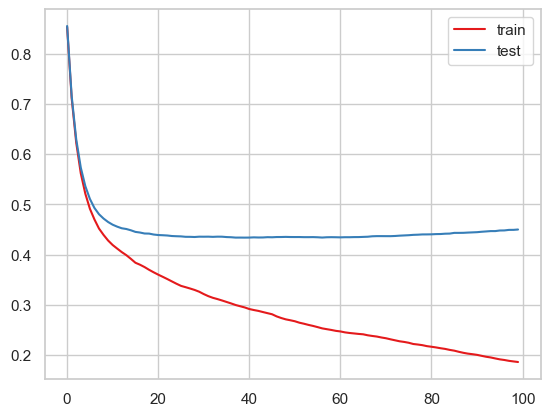

In [626]:
plt.plot(results['validation_0']['mlogloss'], label = 'train')
plt.plot(results['validation_1']['mlogloss'], label = 'test')
plt.legend()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

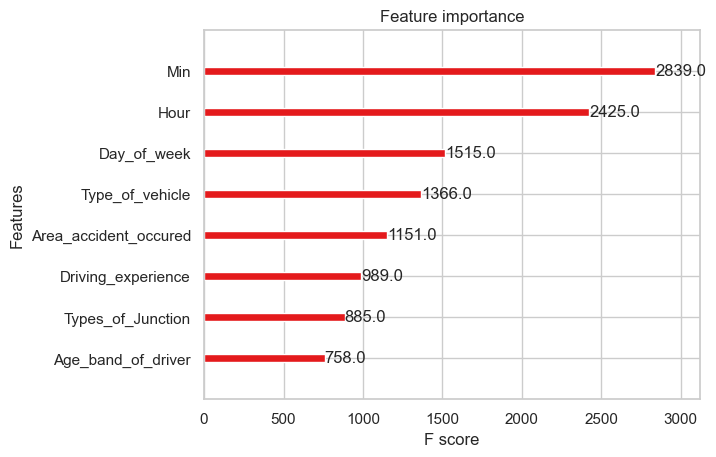

In [627]:
# High variance error: high test error and low training error
# In such case, increase no. of training instances or increase regularization or reduce features
# Result: Recreate training set with more instances, increase reg. by decreasing subsample and colsample_bytree to 0.5 and increasing alpha and lambda to increase penalization, reduce features if possible
plot_importance(xgb)

In [628]:
xgb_tuned = XGBClassifier()

in case of high bias error: high test error and high training error - 
decrease regularization or increase features

In [629]:
# drop age_band
X_temp = X_select.copy()
X_temp = y_select.copy()
X_train, X_test, y_train, y_test = train_test_split(X_select,y_select,test_size = 0.25, random_state =42)
evalset = [(X_train, y_train), (X_test,y_test)]
xgb_tuned = XGBClassifier(colsample_bylevel=0.5, subsample=0.5, reg_alpha = 0.1,reg_lambda = 1.1)
xgb_tuned.fit(X_train,y_train,eval_metric = 'mlogloss', eval_set = evalset)

[0]	validation_0-mlogloss:0.85636	validation_1-mlogloss:0.85601
[1]	validation_0-mlogloss:0.71805	validation_1-mlogloss:0.71835
[2]	validation_0-mlogloss:0.62880	validation_1-mlogloss:0.63126
[3]	validation_0-mlogloss:0.57262	validation_1-mlogloss:0.57654
[4]	validation_0-mlogloss:0.53247	validation_1-mlogloss:0.53968
[5]	validation_0-mlogloss:0.50480	validation_1-mlogloss:0.51415
[6]	validation_0-mlogloss:0.48499	validation_1-mlogloss:0.49616
[7]	validation_0-mlogloss:0.46868	validation_1-mlogloss:0.48357
[8]	validation_0-mlogloss:0.45666	validation_1-mlogloss:0.47461
[9]	validation_0-mlogloss:0.44585	validation_1-mlogloss:0.46813
[10]	validation_0-mlogloss:0.43729	validation_1-mlogloss:0.46404
[11]	validation_0-mlogloss:0.42936	validation_1-mlogloss:0.45890
[12]	validation_0-mlogloss:0.42136	validation_1-mlogloss:0.45494
[13]	validation_0-mlogloss:0.41460	validation_1-mlogloss:0.45191
[14]	validation_0-mlogloss:0.40862	validation_1-mlogloss:0.44893
[15]	validation_0-mlogloss:0.40285	

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0.1, ...)

In [630]:
y_pred = xgb_tuned.predict(X_test)
print ('XGBOOST HYPERTUNING', '\n', skm.classification_report(y_test,y_pred,output_dict = True, target_names = ['Fatal','Serious','Slight']))
print (f'Accuracy is {round(skm.accuracy_score(y_test,y_pred)*100,2)}%')

XGBOOST HYPERTUNING 
 {'Fatal': {'precision': 1.0, 'recall': 0.11627906976744186, 'f1-score': 0.20833333333333334, 'support': 43.0}, 'Serious': {'precision': 0.4803921568627451, 'recall': 0.11611374407582939, 'f1-score': 0.18702290076335878, 'support': 422.0}, 'Slight': {'precision': 0.8615229110512129, 'recall': 0.9796934865900383, 'f1-score': 0.9168160631050556, 'support': 2610.0}, 'accuracy': 0.8491056910569106, 'macro avg': {'precision': 0.7806383559713194, 'recall': 0.40402876681110317, 'f1-score': 0.43739076573391594, 'support': 3075.0}, 'weighted avg': {'precision': 0.8111545652161769, 'recall': 0.8491056910569106, 'f1-score': 0.8067550966372897, 'support': 3075.0}}
Accuracy is 84.91%


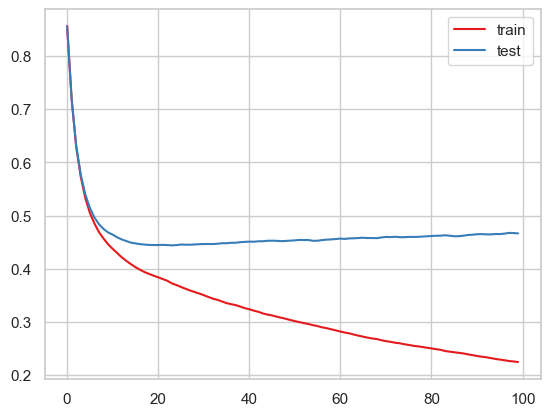

In [631]:
results = xgb_tuned.evals_result()
plt.plot(results['validation_0']['mlogloss'], label = 'train')
plt.plot(results['validation_1']['mlogloss'], label = 'test')
plt.legend()

In [632]:
# Not much diff or slight worsening, let's stop tuning and go with the original
xgb.get_xgb_params()

{'objective': 'multi:softprob',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'monotone_constraints': '()',
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': None,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

## ML Saving ##

In [633]:
joblib.dump(xgb,'XGBoost_model.joblib')

['XGBoost_model.joblib']

In [634]:
model_loaded = joblib.load('XGBoost_model.joblib')

In [650]:
# Retreiving the original test and features
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_select,y_select,test_size = 0.3, random_state =42)
y_pred = model_loaded.predict(X_test_final)





In [636]:
X_test_final.columns

Index(['Hour', 'Min', 'Day_of_week', 'Age_band_of_driver',
       'Driving_experience', 'Type_of_vehicle', 'Area_accident_occured',
       'Types_of_Junction'],
      dtype='object')

In [644]:
X_test_final

Hour  Min  Day_of_week  Age_band_of_driver  Driving_experience  \
3455    12   22        5                2                   1           
8061    15   40        4                4                   3           
7492    10   53        1                1                   3           
2677    13   23        1                1                   2           
11487   18   35        5                2                   1           
...     ...  ...          ...                 ...                 ...   
456     11   30        7                3                   4           
11233    7   30        4                2                   2           
6950     7   59        6                1                   6           
239     15   30        5                1                   1           
2621     7   25        1                2                   3           

       Type_of_vehicle  Area_accident_occured  Types_of_Junction  
3455          7                   5                    3          
8061          1                   4                    1          
7492         10                   2                    2          
2677          1                   5                    2          
11487         3                   5                    2          
...                ...                    ...                ...  
456           1                   6                    3          
11233         7                  11                    2          
6950          4                   3                    1          
239           3                   2                    2          
2621          7                   2                    1          

[3690 rows x 8 columns]

In [643]:
encode.inverse_transform(X_test_final)

Hour  Min Day_of_week Age_band_of_driver Driving_experience  \
3455    12   22     Saturday         31-50               1-2yr       
8061    15   40    Wednesday       Over 51              5-10yr       
7492    10   53       Monday         18-30              5-10yr       
2677    13   23       Monday         18-30          Above 10yr       
11487   18   35     Saturday         31-50               1-2yr       
...     ...  ...         ...                ...                ...   
456     11   30      Tuesday      Under 18               2-5yr       
11233    7   30    Wednesday         31-50          Above 10yr       
6950     7   59     Thursday         18-30           Below 1yr       
239     15   30     Saturday         18-30               1-2yr       
2621     7   25       Monday         31-50              5-10yr       

         Type_of_vehicle    Area_accident_occured Types_of_Junction  
3455      Public (12 seats)                 Other        Crossing    
8061             Automobile      Industrial areas     No junction    
7492           Stationwagen          Office areas         Y Shape    
2677             Automobile                 Other         Y Shape    
11487       Lorry (41?100Q)                 Other         Y Shape    
...                     ...                   ...               ...  
456              Automobile          Church areas        Crossing    
11233     Public (12 seats)          School areas         Y Shape    
6950   Public (13?45 seats)    Recreational areas     No junction    
239         Lorry (41?100Q)          Office areas         Y Shape    
2621      Public (12 seats)          Office areas     No junction    

[3690 rows x 8 columns]

In [648]:
X_test_final['Types_of_Junction'].unique()


array([3, 1, 2, 5, 4, 6])

In [638]:
label.inverse_transform(y_test_final)

array(['Slight Injury', 'Slight Injury', 'Slight Injury', ...,
       'Slight Injury', 'Slight Injury', 'Slight Injury'], dtype=object)

In [649]:
model_loaded.predict(np.array([0,0,1,1,1,1,1,1]).reshape(1,-1))

array([2], dtype=int64)